# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [106]:
df = pd.read_csv('data/grades.csv')

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [68]:
type(df)

pandas.core.frame.DataFrame

In [69]:
df.head(6)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [70]:
df['英文']

0     10
1     10
2     15
3     10
4     12
      ..
95    10
96    10
97     9
98     9
99    11
Name: 英文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [71]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

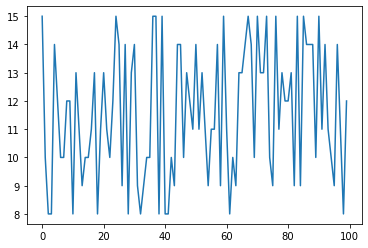

In [72]:
df.數學.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

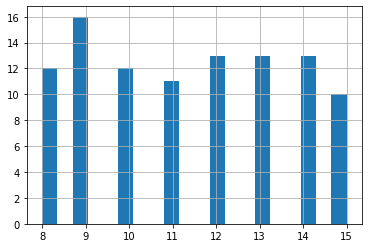

In [73]:
df.英文.hist(bins=20)

## 3 一些基本的資料分析

算平均。

In [74]:
df.數學.mean()

11.57

算標準差。

In [75]:
df.數學.std()

2.310516143307562

不如就該算的都幫我們算算...

In [76]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [77]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [78]:
df.自然.corr(df.數學)

0.014370655446026885

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [79]:
df['總級分']=df.sum(axis=1)
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [80]:
df['加權級分']=df.國文+df.英文*2

In [81]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
0,劉俊安,9,10,15,10,13,57,29
1,胡玉華,10,10,10,8,9,47,30
2,黃淑婷,13,15,8,11,14,61,43
3,陳上紫,10,10,8,9,14,51,30
4,崔靜成,13,12,14,12,13,64,37


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [82]:
df.sort_values(by='總級分',ascending=False).head(6)

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
80,施雅鈴,13,15,12,13,13,66,43
12,李正偉,11,15,11,14,15,66,41
54,陳怡潔,15,15,9,15,11,65,45
25,蔡亦瑄,13,13,14,13,12,65,39
57,胡淳茜,12,15,14,13,11,65,42
37,曾怡君,11,12,15,13,14,65,35


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [83]:
df2=df.sort_values(by=['加權級分','總級分'],ascending=False)

### 【重點】重設 index

In [84]:
df2.index= range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
1,陳怡潔,15,15,9,15,11,65,45
2,王佳蓉,14,15,9,9,8,55,44
3,施雅鈴,13,15,12,13,13,66,43
4,陳怡婷,15,14,12,9,15,65,43
5,黃淑婷,13,15,8,11,14,61,43


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [58]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
7,吳志遠,13,15,15,8,8,59,43
23,李士賢,10,14,15,13,13,65,38
24,詹威德,12,13,15,10,14,64,38
47,曾怡君,11,12,15,13,14,65,35
48,葉儀依,9,13,15,8,14,59,35
50,陳竹伯,10,12,15,10,14,61,34
56,周育霖,9,12,15,13,12,61,33
59,林哲法,14,9,15,10,14,62,32
63,張雅彬,10,11,15,12,8,56,32
70,芮秋辛,11,10,15,10,8,54,31


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [59]:
df2[(df2.數學==15)&(df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
7,吳志遠,13,15,15,8,8,59,43


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [85]:
df2.drop('加權級分',axis=1)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
1,陳怡潔,15,15,9,15,11,65,45
2,王佳蓉,14,15,9,9,8,55,44
3,施雅鈴,13,15,12,13,13,66,43
4,陳怡婷,15,14,12,9,15,65,43
5,黃淑婷,13,15,8,11,14,61,43
...,...,...,...,...,...,...,...,...
96,謝亮夫,9,8,14,11,9,51,25
97,葉必盈,9,8,13,9,12,51,25
98,黃奕霞,9,8,11,13,8,49,25
99,梁慧君,9,8,8,8,12,45,25


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [64]:
df2.drop('總級分',axis=1,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權級分
0,劉俊安,9,10,15,10,13,29
1,胡玉華,10,10,10,8,9,30
2,黃淑婷,13,15,8,11,14,43
3,陳上紫,10,10,8,9,14,30
4,崔靜成,13,12,14,12,13,37


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [87]:
df2[df2.姓名=='吳志遠']

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
7,吳志遠,13,15,15,8,8,59,43


In [92]:
df2.drop(df2[df2.姓名=='吳志遠'].index).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
1,陳怡潔,15,15,9,15,11,65,45
2,王佳蓉,14,15,9,9,8,55,44
3,施雅鈴,13,15,12,13,13,66,43
4,陳怡婷,15,14,12,9,15,65,43
5,黃淑婷,13,15,8,11,14,61,43
6,黃旭忠,15,14,9,12,10,60,43
8,王金鳳,15,14,8,12,8,57,43
9,胡淳茜,12,15,14,13,11,65,42
10,曲秀芬,14,14,8,9,15,60,42
11,林士茜,12,15,9,9,13,58,42


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [108]:
df2.drop(df2[df2.姓名=='吳志遠'].index,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權級分
1,陳怡潔,15,15,9,15,11,65,45
2,王佳蓉,14,15,9,9,8,55,44
3,施雅鈴,13,15,12,13,13,66,43
4,陳怡婷,15,14,12,9,15,65,43
5,黃淑婷,13,15,8,11,14,61,43
...,...,...,...,...,...,...,...,...
96,謝亮夫,9,8,14,11,9,51,25
97,葉必盈,9,8,13,9,12,51,25
98,黃奕霞,9,8,11,13,8,49,25
99,梁慧君,9,8,8,8,12,45,25


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [161]:
import pandas_datareader as pdr
df0 = pdr.get_data_yahoo('AAPL')

In [162]:
df0

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-15,24.602501,24.257500,24.455000,24.285000,117780800.0,22.686680
2016-06-16,24.437500,24.017500,24.112499,24.387501,125307200.0,22.782436
2016-06-17,24.162500,23.825001,24.155001,23.832500,244032800.0,22.263964
2016-06-20,24.142500,23.757500,24.000000,23.775000,137647600.0,22.210251
2016-06-21,24.087500,23.670000,23.735001,23.977501,142185600.0,22.399418
...,...,...,...,...,...,...
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,127.129997
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,126.110001


In [113]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [114]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [116]:
df=df[-300:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.173546,21701800
2016-10-04,113.059998,114.309998,112.629997,113.000000,110.643539,29736800
2016-10-05,113.400002,113.660004,112.690002,113.050003,110.692505,21453100
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.514984,28779300
2016-10-07,114.309998,114.559998,113.510002,114.059998,111.681435,24358400
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

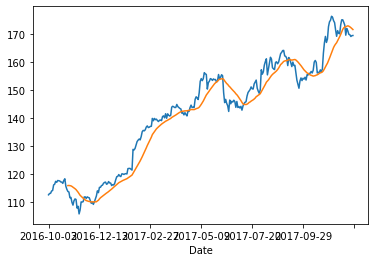

In [119]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

<AxesSubplot:xlabel='Date'>

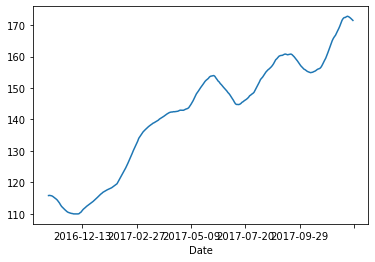

In [120]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

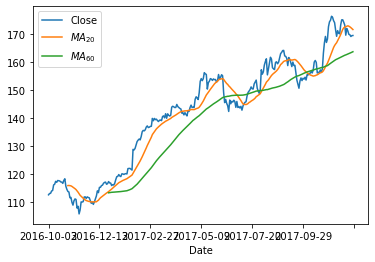

In [121]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [122]:
close = df.Close.values
len(close)

300

In [126]:
x = close[:-2]
len(x)

298

In [129]:
y = close[2:]
len(y)

298

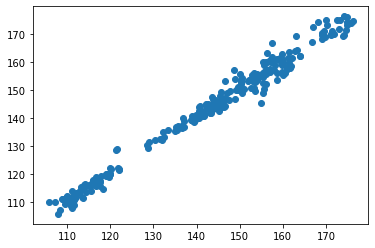

In [130]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [133]:
mydata = np.random.randn(4,3)

In [134]:
mydata

array([[-1.76748793,  0.52552401, -0.67001572],
       [-0.79175345, -0.19302139, -0.07765119],
       [ 1.39784274, -0.80101621,  2.09059333],
       [-1.42331532, -0.29158446, -1.51515392]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [137]:
df2 = pd.DataFrame(mydata, columns=list("甲乙丙"))

In [138]:
df2

,甲,乙,丙
0,-1.767488,0.525524,-0.670016
1,-0.791753,-0.193021,-0.077651
2,1.397843,-0.801016,2.090593
3,-1.423315,-0.291584,-1.515154


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [140]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("甲乙丙"))

In [141]:
df3

,甲,乙,丙
0,-0.534440,-0.707877,-0.049111
1,-0.742320,-0.544597,-0.246723
2,-0.748962,-0.646350,0.393969


In [150]:
df4=pd.concat([df2,df3],axis=0)

In [151]:
df4

,甲,乙,丙
0,-1.767488,0.525524,-0.670016
1,-0.791753,-0.193021,-0.077651
2,1.397843,-0.801016,2.090593
3,-1.423315,-0.291584,-1.515154
0,-0.534440,-0.707877,-0.049111
1,-0.742320,-0.544597,-0.246723
2,-0.748962,-0.646350,0.393969


前面我們弄得亂七八糟的 index 重設一下。

In [152]:
df4.index=range(1,8)

In [153]:
df4

,甲,乙,丙
1,-1.767488,0.525524,-0.670016
2,-0.791753,-0.193021,-0.077651
3,1.397843,-0.801016,2.090593
4,-1.423315,-0.291584,-1.515154
5,-0.534440,-0.707877,-0.049111
6,-0.742320,-0.544597,-0.246723
7,-0.748962,-0.646350,0.393969


#### 横向的貼

In [154]:
df5=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [155]:
df5

,甲,乙,丙,甲,乙,丙
0,-1.767488,0.525524,-0.670016,-0.534440,-0.707877,-0.049111
1,-0.791753,-0.193021,-0.077651,-0.742320,-0.544597,-0.246723
2,1.397843,-0.801016,2.090593,-0.748962,-0.646350,0.393969
3,-1.423315,-0.291584,-1.515154,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [174]:
df_names=pd.read_csv('data/names.csv',names=['姓名'])

In [175]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [176]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [177]:
df_grades

,國文,英文,數學,社會,自然
0,12,15,6,10,6
1,15,14,14,14,11
2,11,15,15,15,14
3,12,11,7,11,15
4,8,6,7,14,9
...,...,...,...,...,...
95,11,6,13,10,6
96,15,13,13,9,9
97,15,10,14,6,9
98,11,8,8,12,9


In [178]:
df_grades.to_csv('data/grades2.csv')

In [179]:
df_grades

,國文,英文,數學,社會,自然
0,12,15,6,10,6
1,15,14,14,14,11
2,11,15,15,15,14
3,12,11,7,11,15
4,8,6,7,14,9
...,...,...,...,...,...
95,11,6,13,10,6
96,15,13,13,9,9
97,15,10,14,6,9
98,11,8,8,12,9


In [180]:
df_total=pd.concat([df_names,df_grades],axis=1)

In [181]:
df_total

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,12,15,6,10,6
1,王紹尹,15,14,14,14,11
2,黃季坤,11,15,15,15,14
3,許正書,12,11,7,11,15
4,張鈞蓮,8,6,7,14,9
...,...,...,...,...,...,...
95,陳君生,11,6,13,10,6
96,曾桂甫,15,13,13,9,9
97,林欣怡,15,10,14,6,9
98,林佳霖,11,8,8,12,9
